# Exercise 2
Build Decision tree model with your selected stock / market index using all attributes to predict `daily returns`(decision).
(`daily returns` must first be converted into a decision class that will be used as the target(label), all other attributes must be grouped into classes)

In [1]:
import pandas as pd

pd.set_option('display.max_colwidth', None)
IBM = pd.read_csv('../Data/IBM.txt.zst', delimiter=' ', index_col='Date')
IBM.head(5)

,Open,High,Low,Close,Volume,Adjusted
Date,,,,,,
2007-01-03,97.180000,98.400002,96.260002,97.269997,9196800,63.127567
2007-01-04,97.250000,98.790001,96.879997,98.309998,10524500,63.802544
2007-01-05,97.599998,97.949997,96.910004,97.419998,7221300,63.224930
2007-01-08,98.500000,99.500000,98.349998,98.900002,10340000,64.185463
2007-01-09,99.080002,100.330002,99.070000,100.070000,11108200,64.944771


In [2]:
IBM.describe(include='all', datetime_is_numeric=True)

,Open,High,Low,Close,Volume,Adjusted
count,3692.000000,3692.000000,3692.000000,3692.000000,3.692000e+03,3692.000000
mean,147.198976,148.403180,146.074512,147.269085,5.576247e+06,113.375997
std,30.808862,30.780935,30.844083,30.796603,3.229710e+06,25.410689
min,72.739998,76.980003,69.500000,71.739998,1.027500e+06,48.040176
25%,124.189999,125.349998,123.072502,124.332496,3.482300e+06,90.296511
50%,144.750000,145.619995,143.830002,144.730003,4.653750e+06,120.980629
75%,168.847500,170.442501,167.659996,169.169998,6.660725e+06,132.155647
max,215.380005,215.899994,214.300003,215.800003,3.806350e+07,155.979538


First we compute the `Daily Returns` as according to the formular:
$r_{t+1} = \frac{p_{t+1} - p_t}{p_t}$

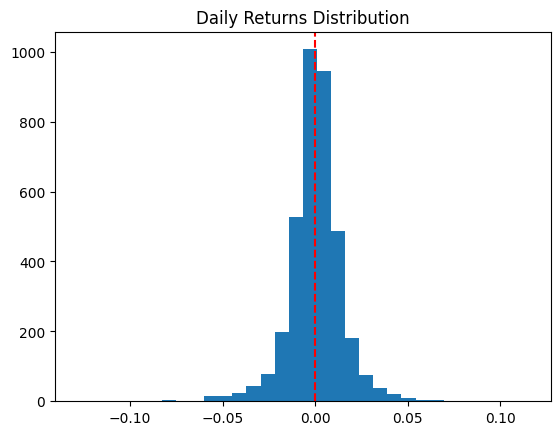

In [3]:
import numpy as np
import matplotlib.pyplot as plt

daily_returns = np.empty(IBM['Close'].shape)
daily_returns[0] = float('NaN')
daily_returns[1:] = np.ediff1d(IBM['Close']) / IBM['Close'][:-1]
IBM['Daily Returns'] = daily_returns

num_bins = 32
plt.hist(daily_returns, bins=num_bins)
plt.title('Daily Returns Distribution')
plt.axvline(x=0, color='red', linestyle='--')
plt.show()

Next we compute some simple moving average and drop the first rows due to `NaN`s.

,Open,High,Low,Close,Volume,Adjusted,Daily Returns,SMA-5,SMA-10,SMA-20,SMA-50,SMA-200
Date,,,,,,,,,,,,
2007-10-18,114.820000,116.410004,114.440002,114.800003,7736500,75.285088,-0.008464,117.203999,117.506001,117.344501,115.320200,105.19595
2007-10-19,113.980003,114.930000,111.800003,112.279999,10327200,73.632500,-0.021951,116.098000,117.104000,117.119501,115.351200,105.26580
2007-10-22,110.970001,113.879997,110.959999,113.370003,7576900,74.347313,0.009708,115.166000,116.664001,116.975501,115.365800,105.34555
2007-10-23,113.779999,114.800003,113.500000,114.680000,5562900,75.206367,0.011555,114.182001,116.302000,116.884001,115.405201,105.42445
2007-10-24,114.199997,114.449997,111.680000,112.949997,8072600,74.071869,-0.015085,113.616000,115.735000,116.666501,115.423200,105.48885


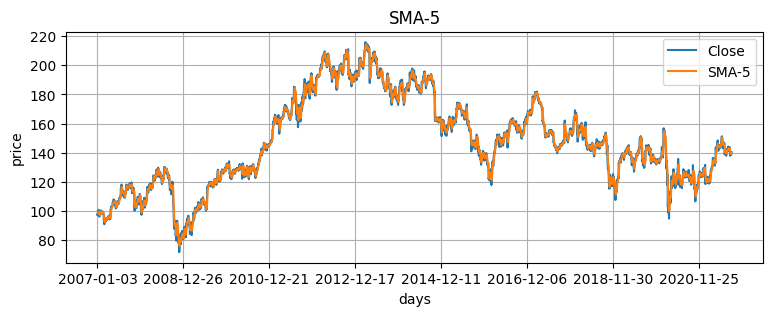

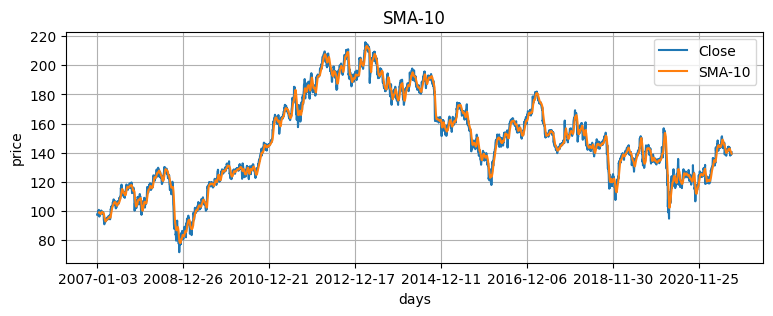

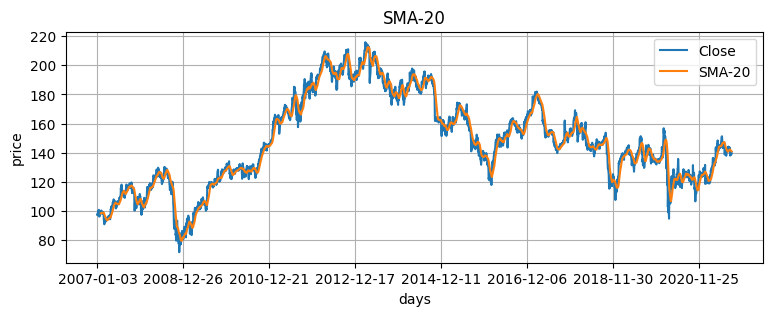

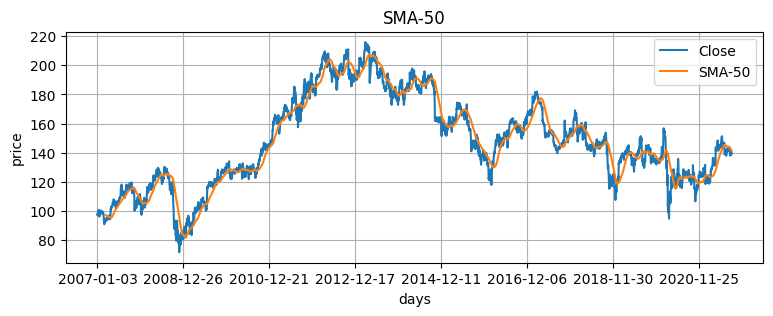

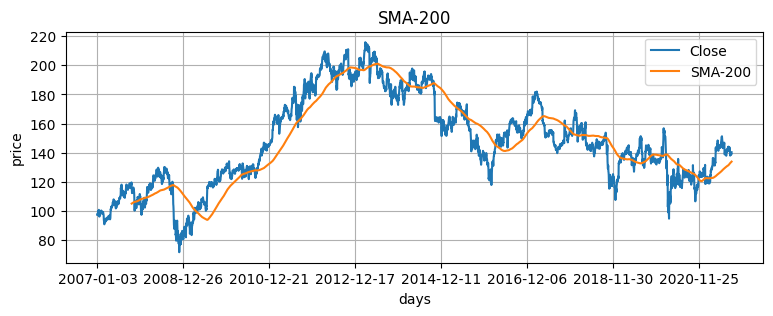

In [4]:
sma_features = []
sma_periods = [5, 10, 20, 50, 200]
for period in sma_periods:
    label = f'SMA-{period}'
    sma_features.append(label)

    IBM[label] = IBM['Close'].rolling(period).mean()
    IBM[['Close', label]].plot(label=label, figsize=(9, 3), title=label, xlabel='days', ylabel='price', grid=True)

IBM = IBM.iloc[max(sma_periods):, :]
IBM.head(5)

Then we factorize all attributes into discrete classes.

In [5]:
NUM_CLASSES = 6
IBM['Daily Returns Class'], _ = pd.qcut(IBM['Daily Returns'], q=NUM_CLASSES).factorize(sort=True)

all_features = ['Volume'] + sma_features

IBM.head(5)

,Open,High,Low,Close,Volume,Adjusted,Daily Returns,SMA-5,SMA-10,SMA-20,SMA-50,SMA-200,Daily Returns Class
Date,,,,,,,,,,,,,
2007-10-18,114.820000,116.410004,114.440002,114.800003,7736500,75.285088,-0.008464,117.203999,117.506001,117.344501,115.320200,105.19595,1
2007-10-19,113.980003,114.930000,111.800003,112.279999,10327200,73.632500,-0.021951,116.098000,117.104000,117.119501,115.351200,105.26580,0
2007-10-22,110.970001,113.879997,110.959999,113.370003,7576900,74.347313,0.009708,115.166000,116.664001,116.975501,115.365800,105.34555,4
2007-10-23,113.779999,114.800003,113.500000,114.680000,5562900,75.206367,0.011555,114.182001,116.302000,116.884001,115.405201,105.42445,5
2007-10-24,114.199997,114.449997,111.680000,112.949997,8072600,74.071869,-0.015085,113.616000,115.735000,116.666501,115.423200,105.48885,0


We define the model we want to evaluate.

In [6]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

## (b) Choose Three feature selection methods to evaluate the model;

In [7]:
from util import *

X = IBM[all_features]
y = IBM['Daily Returns Class']


def foo(func: str, a: np.ndarray, p: np.ndarray, r: np.ndarray, f: np.ndarray, time: float):
    print(func)
    print(f'- Took {time} seconds')
    print('- Averages:')
    print(f' -- Accuracy:  {np.mean(a)}')
    print(f' -- Precision: {np.mean(p)}')
    print(f' -- Recall:    {np.mean(r)}')
    print(f' -- F1:        {np.mean(f)}')
    data = {
        'Fold': range(1, 11),
        'Accuracy': a,
        'Precision': p,
        'Recall': r,
        'F1-Score': f,
    }

    return pd.DataFrame(data).set_index('Fold')

In [8]:
import time

start = time.perf_counter()
a, p, r, f = pca_eval(model, X, y, k=10, c=3, average='macro', zero_division=0)
end = time.perf_counter()
foo('PCA Evaluation', a, p, r, f, end - start)

PCA Evaluation
- Took 0.2408944219996556 seconds
- Averages:
 -- Accuracy:  0.19484240687679083
 -- Precision: 0.1923600695571093
 -- Recall:    0.19422062183256217
 -- F1:        0.18809448899726652


,Accuracy,Precision,Recall,F1-Score
Fold,,,,
1,0.194842,0.19236,0.194221,0.188094
2,0.194842,0.19236,0.194221,0.188094
3,0.194842,0.19236,0.194221,0.188094
4,0.194842,0.19236,0.194221,0.188094
5,0.194842,0.19236,0.194221,0.188094
6,0.194842,0.19236,0.194221,0.188094
7,0.194842,0.19236,0.194221,0.188094
8,0.194842,0.19236,0.194221,0.188094
9,0.194842,0.19236,0.194221,0.188094


In [9]:
start = time.perf_counter()
a, p, r, f = rfe_eval(model, X, y, k=10, f=3, average='macro', zero_division=0)
end = time.perf_counter()
foo('RFE Evaluation', a, p, r, f, end - start)

RFE Evaluation
- Took 0.9596920819994921 seconds
- Averages:
 -- Accuracy:  0.20916905444126074
 -- Precision: 0.210363504674328
 -- Recall:    0.22021764868064678
 -- F1:        0.209128131674487


,Accuracy,Precision,Recall,F1-Score
Fold,,,,
1,0.209169,0.210364,0.220218,0.209128
2,0.209169,0.210364,0.220218,0.209128
3,0.209169,0.210364,0.220218,0.209128
4,0.209169,0.210364,0.220218,0.209128
5,0.209169,0.210364,0.220218,0.209128
6,0.209169,0.210364,0.220218,0.209128
7,0.209169,0.210364,0.220218,0.209128
8,0.209169,0.210364,0.220218,0.209128
9,0.209169,0.210364,0.220218,0.209128


In [10]:
start = time.perf_counter()
a, p, r, f = kbest_eval(model, X, y, k=10, kb=3, average='macro', zero_division=0)
end = time.perf_counter()
foo('3-Best Evaluation', a, p, r, f, end - start)

3-Best Evaluation
- Took 0.20010480500059202 seconds
- Averages:
 -- Accuracy:  0.20057306590257878
 -- Precision: 0.19734808178378946
 -- Recall:    0.19815684115219714
 -- F1:        0.1970280071056428


,Accuracy,Precision,Recall,F1-Score
Fold,,,,
1,0.200573,0.197348,0.198157,0.197028
2,0.200573,0.197348,0.198157,0.197028
3,0.200573,0.197348,0.198157,0.197028
4,0.200573,0.197348,0.198157,0.197028
5,0.200573,0.197348,0.198157,0.197028
6,0.200573,0.197348,0.198157,0.197028
7,0.200573,0.197348,0.198157,0.197028
8,0.200573,0.197348,0.198157,0.197028
9,0.200573,0.197348,0.198157,0.197028


## (b) Compare the feature selection methods and explain the differences observed;

RFE seems to provide the best performance, but takes ca. 4-5x as long as the other methods, therefore not being practical for big datasets.

KBest seems to provide the best tradeoff between performance and runtime.